In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import os

#### the below function will take every parameter in the picture and make everything white excepth the edges of th epicture

In [2]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np
  

def _weight_mean_color(graph, src, dst, n):
    
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])



In [3]:
mypath = r'/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Machine_learning_code/crop_part1 3/'

listing = os.listdir(mypath) 
images = []
for img in listing:
    if img != ".DS_Store":
        image = plt.imread(mypath + img)
        images.append(image)
images = np.array(images)

In [4]:


 
#mypath = '/Users/jenifervivar/Desktop/crop_part1/'#'./Data/CroppedImages'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)



#### trying to make the above as function for easy access

In [5]:
def countourImages(imagesArray):
    images = []
    for img in imagesArray:
        labels = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
        g = graph.rag_mean_color(img, labels)
        labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

        out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
        out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
        images.append(out)
    return np.array(images)


In [11]:
imgArray = countourImages(images[:300])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


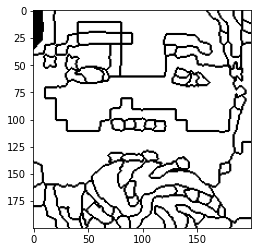

In [12]:
plt.imshow(imgArray[5])

In [13]:
from ImagesProcessingFunctions1 import *
from sklearn.model_selection import train_test_split
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import timeit
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

#### performing really bad on random fores

In [14]:
starttime = timeit.default_timer()
model=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(imgArray, filedfnona['gender'][:300])

nsamples, nx, ny, rgb= X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*rgb))

model.fit(X_train2,y_train)

nsamples, nx, ny, rgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*rgb))

y_pred=model.predict(x_test2)

print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
confusion_plot()
score = accuracy_score(y_pred,y_test)
#scores.append(score)

fig = plt.figure(figsize=(15, 10))


The time difference is : 1.7829016250000222
              precision    recall  f1-score   support

           0       0.33      0.58      0.42        19
           1       0.81      0.61      0.69        56

    accuracy                           0.60        75
   macro avg       0.57      0.59      0.56        75
weighted avg       0.69      0.60      0.63        75

[[11  8]
 [22 34]]


NameError: name 'confusion_plot' is not defined

In [ ]:
plot_tree(model.estimators_[0], 
          #feature_names=y_train[0],
          #class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)